In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
sns.set()

## The intialization function.

In [23]:
def intialize_weights(layer_dims):
    parameters = {}
    L = len(layer_dims)
    for l in range(L-1) :
        rows = layer_dims[l+1]
        cols = layer_dims[l]
        parameters['W'+str(l+1)] = np.random.uniform(-2.4/cols,2.4/cols,(rows,cols))
        parameters['b'+str(l+1)] = np.zeros([rows,1],dtype=float)
    return  parameters
        

## The Activation functions needed and their deravatives.

In [24]:
def relu(Z):
    return np.maximum(Z,0)
def relu_derivative(A):
    return (A > 0) *1


In [25]:
def sigmoid(Z):
    A = 1/(1+np.exp(-Z))
    return A
def sigmoid_derivative(A):
    return A * (1 - A)

## Forward Propagation.

In [26]:
def forward_propegation(X , Y, parameters):
    L = len(parameters) // 2
    cache = {}
    for l in range(1,L):
        if l==1:
            cache['Z' + str(l)] = np.dot(parameters['W' + str(l)],X) + parameters['b' + str(l)]
            cache['A' + str(l)] = relu(cache['Z' + str(l)])
        else:
            cache['Z' + str(l)] = np.dot(parameters['W' + str(l)],cache['A' + str(l-1)]) + parameters['b' + str(l)]
            cache['A' + str(l)] = relu(cache['Z' + str(l)])         
    cache['Z' + str(L)] = np.dot(parameters['W' + str(L)],cache['A' + str(L-1)]) 
    cache['A' + str(L)] = sigmoid(cache['Z' + str(L)])
    AL = cache['A' + str(L)]
    return AL, cache
        

## Error Calculation.

In [27]:
def Error_calculate(AL , Y , cache, parameters):
    m = Y.shape[1]
    L = len(parameters) // 2
    errors = {}
    Y_k = AL
    # Y is desired output, Y_k is actual output.
    delta_k = sigmoid_derivative(Y_k) * (Y - Y_k)
    errors['delta_'+str(L)] = delta_k
    for l in reversed(range(1,L)):
        Y_j= cache['A'+str(l)]
        delta_j = relu_derivative(Y_j) * np.dot( parameters['W' + str(l+1)].T ,errors['delta_'+ str(l+1)]) 
        errors['delta_'+str(l)] = delta_j
    return errors

        

## Back Propagation.

In [28]:
def Back_propagation(X,parameters, errors, cache, learning_rate = 0.02):
    
    L = len(parameters) // 2
    for l in reversed(range(1,L+1)):
        if l>1:
            Y_j = cache['A' + str(l-1)]
        else:
            Y_j = X
        delta_k = errors['delta_' +str(l)]
        d_w = learning_rate *np.dot( Y_j, delta_k.T)
        d_b = learning_rate *delta_k.T
        parameters['W' + str(l)] = np.add(parameters['W' + str(l)] , d_w.T)
        parameters['b' + str(l)] = np.add(parameters['b' + str(l)] ,np.sum(d_b.T, axis=1, keepdims =True))
    return parameters

## Cost functions 

In [29]:
def root_mean_squared_error(target , actual):
    m = target.shape[0]  
    return np.sqrt((np.sum((target - actual)**2))/m)

In [30]:
def mean_absolute_error(target , actual ,with_mean = True):
    m = target.shape[0]
    if with_mean:
        return (np.abs(target - actual).sum())/m
    else:
        return np.abs(target - actual).sum()

## Building the model all together

In [31]:
def model(X_train , Y_train , layer_dims = [9,100,1], epochs = 1000, learning_rate =0.1):
    np.random.seed(42)
    weights = intialize_weights(layer_dims)
    costs = []
    accs = []
    print('__________________________________________________________')
    for epoch in range(epochs):
        AL , cache = forward_propegation(X_train , Y_train ,weights)
        errors = Error_calculate(AL , Y_train , cache , weights)
        weights = Back_propagation(X_train , weights ,errors, cache, learning_rate  )
        predictions = AL
        predictions[predictions  > 0.6] =1
        predictions[predictions <= 0.6] =0
        cost = root_mean_squared_error(predictions[0], Y_train).round(4)
        acc = 1 - mean_absolute_error(predictions[0] ,Y_train)
        costs.append(cost)
        accs.append(acc)
        if epoch % 50 ==0:
            print('Epoch: ',epoch)
            print('Accuaracy: ',(acc*100).round(2),'%')
            print('Cost: ',cost)
            print('--------------------------------------------------')
    plt.plot(np.arange(epochs) , accs, 'g')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    #plt.savefig('acc.jpg', format='jpg', dpi=1800)
    plt.show()
    return weights #,costs


## Evaluate Function

In [32]:
def evaluate(X , Y, parameters , dataset='Test' ,return_result =True ):
    predictions ,cache = forward_propegation(X , Y, parameters )
    predictions[predictions > 0.6]  =1
    predictions[predictions <= 0.6]  =0
    accuaracy = ((1 - mean_absolute_error(predictions[0] ,Y))*100).round(2)
    cost = root_mean_squared_error(predictions[0], Y).round(4)
    print(dataset,' Accuaracy: ',accuaracy,'%')
    print(dataset,' Cost: ', root_mean_squared_error(predictions[0], Y).round(4))
    if return_result:
        return accuaracy , cost

## Loading the data.

In [33]:
train_set = pd.read_csv('final_train_set.csv',index_col =0)
test_set  = pd.read_csv('final_test_set.csv' ,index_col =0)

In [34]:
x_train = train_set.drop(['Survived'],axis =1)
y_train = train_set.Survived

X_train = x_train.to_numpy().T
Y_train = y_train.to_numpy().reshape(1,-1)

x_test= test_set.drop(['Survived'],axis =1)
y_test = test_set.Survived

X_test = x_test.to_numpy().T
Y_test = y_test.to_numpy().reshape(1,-1)


## Training the model.

__________________________________________________________
Epoch:  0
Accuaracy:  61.46 %
Cost:  0.6208
--------------------------------------------------
Epoch:  50
Accuaracy:  85.44 %
Cost:  0.3815
--------------------------------------------------


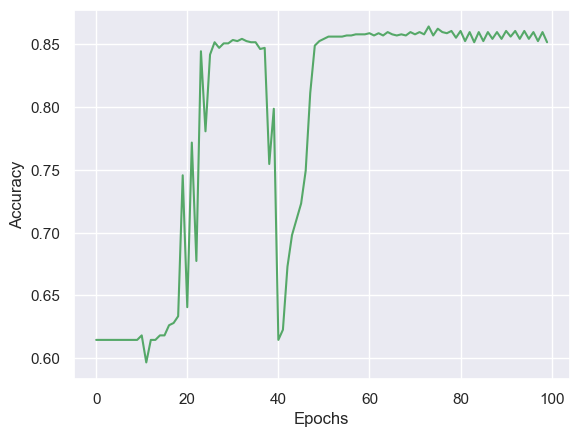

In [43]:
weights= model(X_train , Y_train , layer_dims = [9,150,50,1], epochs = 100, learning_rate =0.005)   

## Evaluating the final model on train and test data.

In [36]:
evaluate(X_train, Y_train, weights , dataset ='Train' , return_result=False)

Train  Accuaracy:  86.07 %
Train  Cost:  0.3732


In [37]:
evaluate(X_test, Y_test, weights , dataset ='Test' , return_result= False)

Test  Accuaracy:  91.84 %
Test  Cost:  0.2857


**The code below is just for reproting purposes.**

In [38]:
# alphas = [0.1 ,0.05 ,0.02 , 0.01 ,0.005 ,0.002 ,0.001 ,0.1 ,0.05 ,0.02 , 0.01 ,0.005 ,0.002 ,0.001 ]
# epochs = [100 ,200,300,500 ,700 ,800 ,1000, 1000 , 200,300,500 ,100 ,700 ,800 ]
# layers = [[9,60,1],[9,30,1],[9,75,50,1],[9,50,25,1],[9,128,1],[9,100,50,1],[9,50,1],[9,25,1],[9,50,25,1],[9,30,1],[9,64,32,1],[9,150,50,1],[9,100,50,1],[9,25,5,1]]

# train_errors = []
# train_accuracies = []
# test_errors = []
# test_accuracies = []
# for i in range(len(layers)):
#     print(layers[i])
#     W = model(X_train , Y_train , layer_dims = layers[i], epochs = epochs[i], learning_rate =alphas[i])
#     train_acc , train_cost = evaluate(X_train , Y_train, W )
#     test_acc , test_cost = evaluate(X_test , Y_test , W )
#     train_errors.append(train_cost)
#     train_accuracies.append(train_acc)
#     test_errors.append(test_cost)
#     test_accuracies.append(test_acc)

In [39]:
# import dataframe_image as dfi

# models = ['[9,60,1]','[9,30,1]','[9,75,50,1]','[9,50,25,1]','[9,128,1]','[9,100,50,1]','[9,50,1]',
#          '[9,25,1]','[9,50,25,1]','[9,30,1]','[9,64,32,1]','[9,150,50,1]','[9,100,50,1]','[9,25,5,1]']

# Hyper = np.array([models , alphas,epochs,train_errors , 
# train_accuracies , test_errors , test_accuracies ]).T

# tuning = pd.DataFrame(Hyper,columns = [ 'Model','Learning rate','Epochs',
#     'Train RMSE','Train accuracy' ,
# 'Test RMSE' ,'Test accuracy' ] ,index_col=False)
# tuning.sort_values(by= 'Test accuracy',ascending= False)


In [40]:
# dfi.export(tuning.sort_values(by= 'Test accuracy',ascending= False).reset_index(), 'models.jpg',dpi=1200)

In [41]:
# alphas = [0.1, 0.01, 0.002 , 0.001]
# losses = []
# for i in range(len(alphas)):
#     W , c = model(X_train , Y_train , layer_dims = [9,1], epochs = 1000, learning_rate =alphas[i])
#     losses.append(c)

In [42]:
# epochs=1000
# EPOCHS = np.arange(epochs)
# fig, axs = plt.subplots(2,2 , figsize = (12,8))
# fig.suptitle('Costs VS Epochs in Differenet Learning rates')

# axs[0,0].plot(EPOCHS, losses[0], 'r')
# axs[0,0].set_title('α = 0.1')

# axs[0,1].plot(EPOCHS, losses[1], 'y')
# axs[0,1].set_title('α = 0.01')
# axs[0,1].set_xlabel('Epochs')


# axs[1,0].plot(EPOCHS, losses[2], 'b')
# axs[1,0].set_title('α = 0.002')

# axs[1,1].plot(EPOCHS, losses[3], 'c')
# axs[1,1].set_title('α = 0.001')

# # # plt.xlabel('Epochs')
# # plt.ylabel('Loss')
# for ax in fig.get_axes():
#     ax.label_outer()

# axs[0,0].set_xlabel('Epochs')
# axs[0,1].set_xlabel('Epochs')
# axs[1,0].set_xlabel('Epochs')
# axs[1,1].set_xlabel('Epochs')

# axs[0,0].set_ylabel('Loss')
# axs[0,1].set_ylabel('Loss')
# axs[1,0].set_ylabel('Loss')
# axs[1,1].set_ylabel('Loss')


# #fig.savefig('costs.jpg', format='jpg', dpi=1800)
# plt.show()
